##### 13-Feb-2022
## Movie engagement score predictor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"G:\Datasets\Jobathon Movie engagement score\train_0OECtn8.csv",index_col='row_id')
df.head()

,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
row_id,,,,,,,,,
1,19990,37,128,24,Male,Student,180,1000,4.33
2,5304,32,132,14,Female,Student,330,714,1.79
3,1840,12,24,19,Male,Student,180,138,4.35
4,12597,23,112,19,Male,Student,220,613,3.77
5,13626,23,112,27,Male,Working Professional,220,613,3.13


In [3]:
df.shape

(89197, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89197 entries, 1 to 89197
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           89197 non-null  int64  
 1   category_id       89197 non-null  int64  
 2   video_id          89197 non-null  int64  
 3   age               89197 non-null  int64  
 4   gender            89197 non-null  object 
 5   profession        89197 non-null  object 
 6   followers         89197 non-null  int64  
 7   views             89197 non-null  int64  
 8   engagement_score  89197 non-null  float64
dtypes: float64(1), int64(6), object(2)
memory usage: 6.8+ MB


## Data Sanitization

#### 1. Checking if any null values

In [5]:
df.isnull().sum()

user_id             0
category_id         0
video_id            0
age                 0
gender              0
profession          0
followers           0
views               0
engagement_score    0
dtype: int64

In [6]:
df.nunique()

user_id             27734
category_id            47
video_id              175
age                    58
gender                  2
profession              3
followers              17
views                  43
engagement_score      229
dtype: int64

## Exploratory Data Analysis

#### 1. What is the distinct count of users, videos, category_ids, profession

In [7]:
print('Distinct users:        ',df.user_id.nunique())
print('Distinct videos:       ',df.video_id.nunique())
print('Distinct category_ids: ',df.category_id.nunique())

Distinct users:         27734
Distinct videos:        175
Distinct category_ids:  47


In [8]:
print(f"On average, a user has watched {int(89197/27734)} videos")
print(f"On average, a video was watched by {int(27734/175)} users")
print(f"On average, a category consists of {int(175/47)} videos")

On average, a user has watched 3 videos
On average, a video was watched by 158 users
On average, a category consists of 3 videos


#### 2. Distribution of numerical variables

In [9]:
df.describe(percentiles=(np.arange(0.1,1,0.1))).astype('int').T

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
user_id,89197,13881,8005,1,2785,5570,8334,11136,13892,16656,19418,22199,24959,27734
category_id,89197,18,11,1,5,7,9,12,16,20,25,31,35,47
video_id,89197,77,48,1,12,27,42,58,76,97,112,128,144,175
age,89197,24,8,10,14,17,19,21,23,26,30,33,37,68
followers,89197,252,46,160,180,230,230,240,240,250,270,280,330,360
views,89197,502,268,30,138,229,317,369,467,628,662,781,884,1000
engagement_score,89197,3,0,0,2,2,3,3,3,3,3,4,4,5


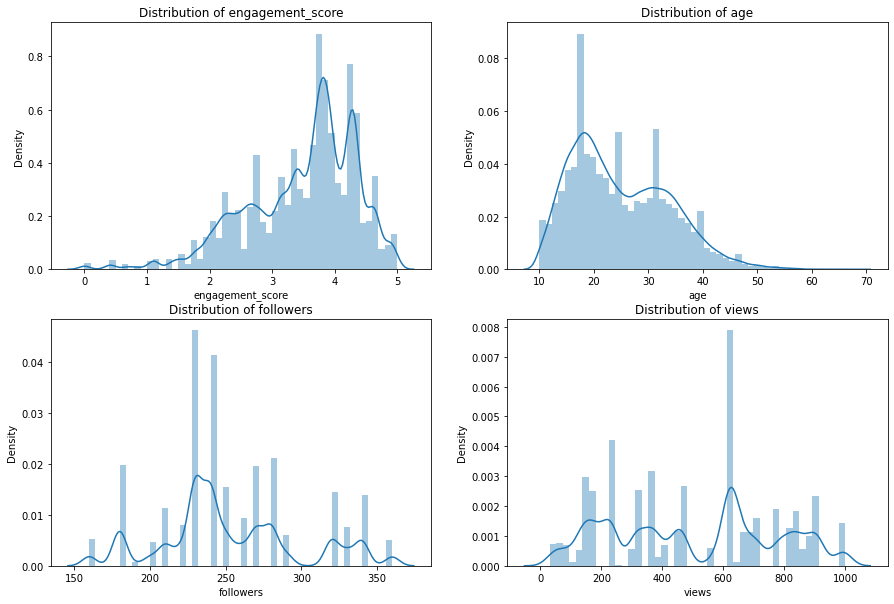

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
x=0
y=0
cols = ['engagement_score','age','followers','views']
for col in cols:
    sns.distplot(df[col], ax=axes[x,y]).set(title=f'Distribution of {col}')  
    y=y+1
    if y>1:
        x=x+1
        y=0
    if x>1:
        break

Inferences: The above variables distribution lightly resembles normal distribution, which is a good thing  
1. Engagement score is left skewed, which is more people tend to be highly engaged  
2. Age is right skewed, that is more young people watch the movies than do older people  
3. followers and views have erratic but normal distribution 

In [11]:
df.isnull().sum()

user_id             0
category_id         0
video_id            0
age                 0
gender              0
profession          0
followers           0
views               0
engagement_score    0
dtype: int64

#### 3. Bi-variate analysis, categorical values impact on engagement score

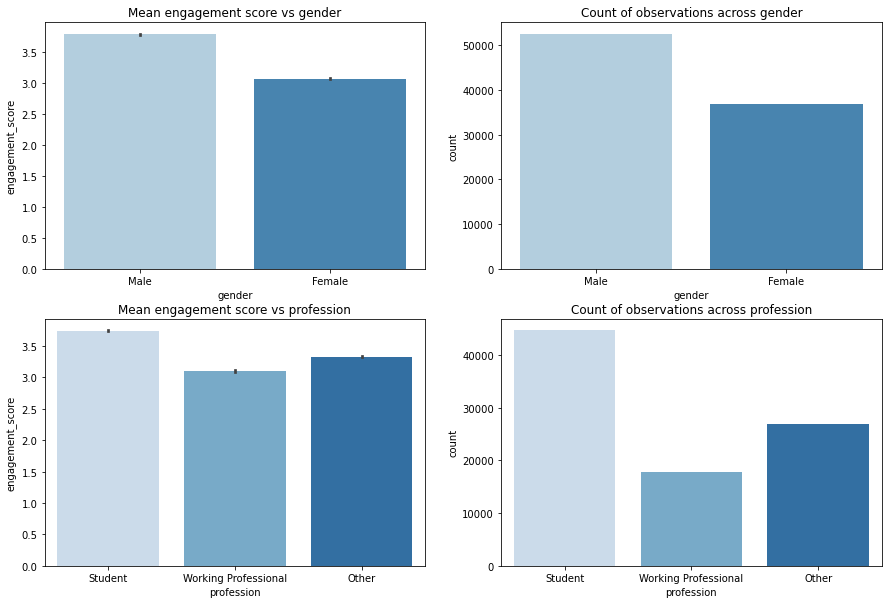

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
x=0
y=0
cols = ['gender','profession']
for col in cols:
    sns.barplot(x=col,y='engagement_score', data=df, 
                ax=axes[x,0],palette = "Blues").set(title=f'Mean engagement score vs {col}')
    sns.countplot(x=col,data=df,
                  ax=axes[x,1],palette = "Blues").set(title=f'Count of observations across {col}')
    x=x+1
    if x>1:
        break

### Tableau Dashboard

I have created a Tableau Dashboard where further analysis on the same is done. Please follow the link for the same  
https://public.tableau.com/app/profile/kenrich/viz/MovieEngagementscoreEDA/Dashboard

### Statistical test

Null Hypothesis:      The effect of Male and Female on engagement score is equal

Alternate Hypothesis: The effect of Male and Female on engagement score is not equal

In [13]:
from scipy import stats

alpha = 0.05
t_value, p_value = stats.ttest_ind(df[df.gender=='Male']['engagement_score'].values,
                                   df[df.gender=='Female']['engagement_score'].values)

print(f'Test statistic is {t_value:0.2f}\n')
print(f'p-value for two tailed test is {p_value:0.2f}\n')

if p_value <= alpha:    
    print(f'Conclusion: Since p-value {p_value:0.2f} < {alpha}, we reject null hypothesis\n')
    print(f'So we conclude that there is significant mean difference in engagement_score at {alpha*100}% level of significance') 

else:
    print(f'Conclusion: Since p-value {p_value:0.2f} > {alpha}, we accept null hypothesis')
    print(f'So we conclude that there is no significant mean difference in engagement_score at {alpha*100}% level of significance') 


Test statistic is 133.74

p-value for two tailed test is 0.00

Conclusion: Since p-value 0.00 < 0.05, we reject null hypothesis

So we conclude that there is significant mean difference in engagement_score at 5.0% level of significance


## Data Processing

#### Categorising video category based on average engagement score

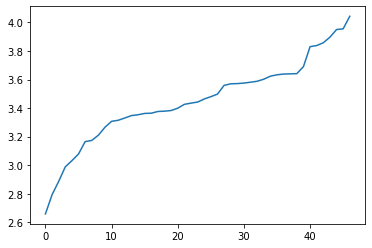

In [14]:
df_category = df.groupby('category_id')['engagement_score'].mean().sort_values().reset_index()
df_category['engagement_score'].plot();

In [15]:
df_category['category_bin'] = np.where(df_category['engagement_score']<3.3, 'Low score category',
                                      np.where(df_category['engagement_score']<3.65,'Mid score category',
                                              'High score category'))
df_category.category_bin.value_counts()

Mid score category     29
Low score category     10
High score category     8
Name: category_bin, dtype: int64

In [16]:
# Merging the new tags with original dataframe
df=df.merge(df_category[['category_id','category_bin']], on='category_id')
df.head()

,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score,category_bin
0,19990,37,128,24,Male,Student,180,1000,4.33,Mid score category
1,2467,37,108,42,Female,Working Professional,180,1000,1.96,Mid score category
2,18931,37,108,47,Female,Working Professional,180,1000,1.55,Mid score category
3,1684,37,128,37,Male,Other,180,1000,2.48,Mid score category
4,2898,37,108,13,Male,Student,180,1000,4.65,Mid score category


#### Categorising users based on average engagement score

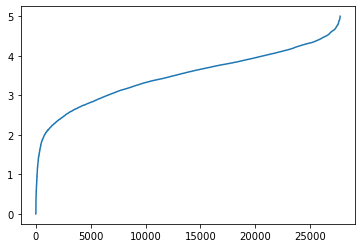

In [17]:
df_users = df.groupby('user_id')['engagement_score'].mean().sort_values().reset_index()
df_users['engagement_score'].plot();

In [18]:
df_users['users_bin'] = np.where(df_users['engagement_score']<3, 'Low score users',
                                 np.where(df_users['engagement_score']<4.5,'Mid score users',
                                          'High score users'))
df_users.users_bin.value_counts()

Mid score users     19912
Low score users      6527
High score users     1295
Name: users_bin, dtype: int64

In [19]:
# Merging the new tags with original dataframe
df=df.merge(df_users[['user_id','users_bin']], on='user_id')
df.head()

,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score,category_bin,users_bin
0,19990,37,128,24,Male,Student,180,1000,4.33,Mid score category,High score users
1,19990,43,148,24,Male,Student,280,617,4.77,High score category,High score users
2,19990,43,149,24,Male,Student,280,617,4.92,High score category,High score users
3,2467,37,108,42,Female,Working Professional,180,1000,1.96,Mid score category,Mid score users
4,2467,37,128,42,Female,Working Professional,180,1000,3.65,Mid score category,Mid score users


#### One hot encoding of categorical variables

In [20]:
df_dummies = pd.get_dummies(df[['gender','profession','category_bin','users_bin']],drop_first=True)
df = df.merge(df_dummies, left_index=True, right_index=True)
df.head()

,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score,category_bin,users_bin,gender_Male,profession_Student,profession_Working Professional,category_bin_Low score category,category_bin_Mid score category,users_bin_Low score users,users_bin_Mid score users
0,19990,37,128,24,Male,Student,180,1000,4.33,Mid score category,High score users,1,1,0,0,1,0,0
1,19990,43,148,24,Male,Student,280,617,4.77,High score category,High score users,1,1,0,0,0,0,0
2,19990,43,149,24,Male,Student,280,617,4.92,High score category,High score users,1,1,0,0,0,0,0
3,2467,37,108,42,Female,Working Professional,180,1000,1.96,Mid score category,Mid score users,0,0,1,0,1,0,1
4,2467,37,128,42,Female,Working Professional,180,1000,3.65,Mid score category,Mid score users,0,0,1,0,1,0,1


#### Standard Scaling of numerical variables

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

df_sc = sc.fit_transform(df[['followers','views']])
df_sc = pd.DataFrame(df_sc, columns=['followers_sc','views_sc'])

df = df.merge(df_sc, left_index=True, right_index=True)
df.head()

,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score,category_bin,users_bin,gender_Male,profession_Student,profession_Working Professional,category_bin_Low score category,category_bin_Mid score category,users_bin_Low score users,users_bin_Mid score users,followers_sc,views_sc
0,19990,37,128,24,Male,Student,180,1000,4.33,Mid score category,High score users,1,1,0,0,1,0,0,-1.572002,1.850629
1,19990,43,148,24,Male,Student,280,617,4.77,High score category,High score users,1,1,0,0,0,0,0,0.597468,0.424547
2,19990,43,149,24,Male,Student,280,617,4.92,High score category,High score users,1,1,0,0,0,0,0,0.597468,0.424547
3,2467,37,108,42,Female,Working Professional,180,1000,1.96,Mid score category,Mid score users,0,0,1,0,1,0,1,-1.572002,1.850629
4,2467,37,128,42,Female,Working Professional,180,1000,3.65,Mid score category,Mid score users,0,0,1,0,1,0,1,-1.572002,1.850629


In [22]:
df.columns

Index(['user_id', 'category_id', 'video_id', 'age', 'gender', 'profession',
       'followers', 'views', 'engagement_score', 'category_bin', 'users_bin',
       'gender_Male', 'profession_Student', 'profession_Working Professional',
       'category_bin_Low score category', 'category_bin_Mid score category',
       'users_bin_Low score users', 'users_bin_Mid score users',
       'followers_sc', 'views_sc'],
      dtype='object')

In [23]:
df_fin = df[['followers_sc','views_sc', 'gender_Male',
             'profession_Student','profession_Working Professional',
             'category_bin_Low score category', 'category_bin_Mid score category',
             'users_bin_Low score users', 'users_bin_Mid score users',
             'engagement_score']]
df_fin.head()

,followers_sc,views_sc,gender_Male,profession_Student,profession_Working Professional,category_bin_Low score category,category_bin_Mid score category,users_bin_Low score users,users_bin_Mid score users,engagement_score
0,-1.572002,1.850629,1,1,0,0,1,0,0,4.33
1,0.597468,0.424547,1,1,0,0,0,0,0,4.77
2,0.597468,0.424547,1,1,0,0,0,0,0,4.92
3,-1.572002,1.850629,0,0,1,0,1,0,1,1.96
4,-1.572002,1.850629,0,0,1,0,1,0,1,3.65


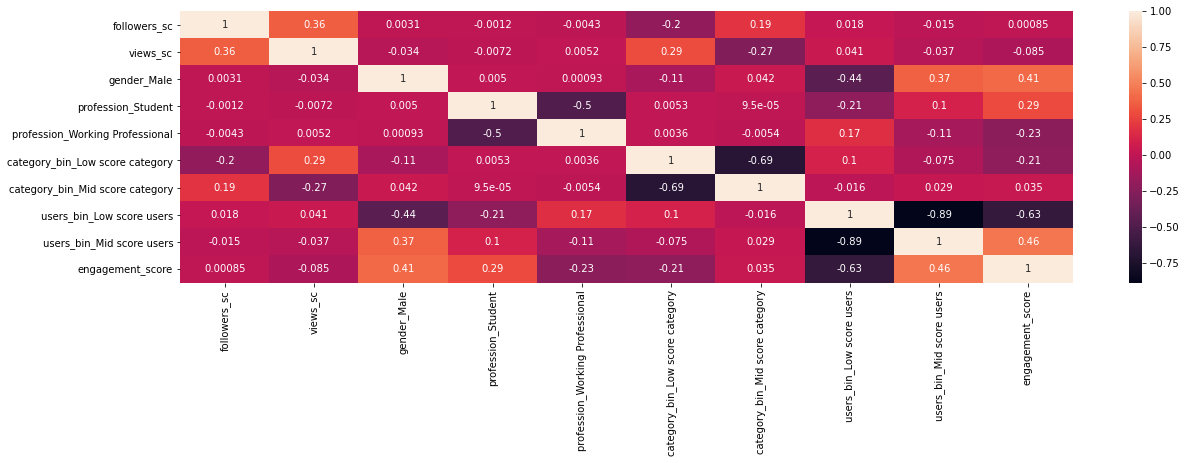

In [24]:
plt.figure(figsize=(20,5))
sns.heatmap(df_fin.corr(), annot = True);

In [25]:
'''Since the correlation of columns followers_sc and views_sc is less than 0.1, and the distribution plot shows no pattern,
   we can remove these two columns to reduce any dimensionality error'''
df_fin.drop(['followers_sc','views_sc'], axis=1, inplace=True)

### Machine learning Algos

In [26]:
y = df_fin.engagement_score
X = df_fin.drop('engagement_score', axis=1)
y.shape, X.shape

((89197,), (89197, 7))

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((62437, 7), (26760, 7), (62437,), (26760,))

In [28]:
X_train.columns

Index(['gender_Male', 'profession_Student', 'profession_Working Professional',
       'category_bin_Low score category', 'category_bin_Mid score category',
       'users_bin_Low score users', 'users_bin_Mid score users'],
      dtype='object')

### Calculating VIF

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
   
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'].sort_values()

    return(vif)

In [30]:
calc_vif(X)

,variables,VIF
0,gender_Male,0.009032
1,profession_Student,0.005052
2,profession_Working Professional,0.005054
3,category_bin_Low score category,0.017477
4,category_bin_Mid score category,0.009579
5,users_bin_Low score users,0.036370
6,users_bin_Mid score users,0.005170


Generally, a VIF above 4 or tolerance below 0.25 indicates that multicollinearity might exist, and further investigation is required.   
When VIF is higher than 10 or tolerance is lower than 0.1, there is significant multicollinearity that needs to be corrected.  
  
Since all the above variables have VIF below 4 and above 0.25, we can be assured that there is no multicollinearity.

In [31]:
# We will save the model performance metrics in a DataFrame

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
Model = []
RMSE = []
R_sq = []
cv = KFold(5)

#Creating a Function to append the cross validation scores of the algorithms
def input_scores(name, model, x, y):
    Model.append(name)
    RMSE.append(np.sqrt((-1) * cross_val_score(model, x, y, cv=cv, 
                                               scoring='neg_mean_squared_error').mean()))
    R_sq.append(cross_val_score(model, x, y, cv=cv, scoring='r2').mean())

In [32]:
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor)

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor', 
         'Random Forest Regressor', 'Gradient Boosting Regressor',
         'Adaboost Regressor','XGBRegressor']

models = [LinearRegression(), Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor(),
          RandomForestRegressor(), GradientBoostingRegressor(), 
          AdaBoostRegressor(),XGBRegressor()]

#Running all algorithms
for name, model in zip(names, models):
    input_scores(name, model, X_train, y_train)

Reference: https://www.kaggle.com/swatisinghalmav/best-of-8-regression-models-to-predict-strength

In [33]:
evaluation = pd.DataFrame({'Model': Model,'RMSE': RMSE,'R Squared': R_sq})
print("FOLLOWING ARE THE TRAINING SCORES: ")
evaluation

FOLLOWING ARE THE TRAINING SCORES: 


,Model,RMSE,R Squared
0,Linear Regression,0.607323,0.506181
1,Ridge Regression,0.607323,0.506181
2,Lasso Regression,0.864261,-0.000025
3,K Neighbors Regressor,0.656600,0.422687
4,Decision Tree Regressor,0.600833,0.516680
5,Random Forest Regressor,0.600838,0.516671
6,Gradient Boosting Regressor,0.601029,0.516368
7,Adaboost Regressor,0.634320,0.458604
8,XGBRegressor,0.600833,0.516681


## Test data

In [34]:
df_test=pd.read_csv(r"G:\Datasets\Jobathon Movie engagement score\test_1zqHu22.csv")
df_test.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
0,89198,7986,12,42,14,Male,Student,180,138
1,89199,11278,34,115,14,Male,Student,230,840
2,89200,17245,8,110,44,Female,Working Professional,280,628
3,89201,9851,16,137,18,Male,Student,270,462
4,89202,16008,34,96,47,Female,Other,230,840


In [35]:
df_test = df_test.merge(df_users[['user_id','users_bin']], on='user_id')
df_test = df_test.merge(df_category[['category_id','category_bin']], on='category_id')
df_test.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,users_bin,category_bin
0,89198,7986,12,42,14,Male,Student,180,138,Mid score users,Mid score category
1,89239,16220,12,25,40,Male,Other,180,138,Mid score users,Mid score category
2,89243,20335,12,88,11,Male,Student,180,138,Mid score users,Mid score category
3,89268,6490,12,162,31,Male,Other,180,138,Mid score users,Mid score category
4,89295,13331,12,30,34,Male,Working Professional,180,138,Mid score users,Mid score category


In [36]:
df_test.shape

(11121, 11)

In [37]:
df_dummies = pd.get_dummies(df_test[['gender','profession','users_bin','category_bin']],drop_first=True)
df_test = pd.concat([df_test, df_dummies], axis=1) 
df_test.shape

(11121, 18)

In [38]:
df_fin = df_test[['gender_Male','profession_Student','profession_Working Professional',
                 'category_bin_Low score category', 'category_bin_Mid score category',
                 'users_bin_Low score users', 'users_bin_Mid score users','row_id']].set_index('row_id')
df_fin.head()

,gender_Male,profession_Student,profession_Working Professional,category_bin_Low score category,category_bin_Mid score category,users_bin_Low score users,users_bin_Mid score users
row_id,,,,,,,
89198,1,1,0,0,1,0,1
89239,1,0,0,0,1,0,1
89243,1,1,0,0,1,0,1
89268,1,0,0,0,1,0,1
89295,1,0,1,0,1,0,1


In [39]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
df_fin['engagement_score'] = model.predict(df_fin)

In [40]:
df_sub = df_fin[['engagement_score']].reset_index()
df_sub.head()

,row_id,engagement_score
0,89198,3.997328
1,89239,3.713954
2,89243,3.997328
3,89268,3.713954
4,89295,3.512858


In [41]:
df_sub.shape

(11121, 2)

In [42]:
df_sub.to_csv(r"G:\Datasets\Jobathon Movie engagement score\kenny_movie_engmnt_score_submission_v6.csv",index=False)

## Thank you